## TP3
- Da página 30 até 35 porém invés de distribuição de Poisson usar distribuição de __Gauss__
- 'Como criar binomial' -> Só que Gauss (normal): Cumulativa, gráficos, moda, mediana, desvio padrão

### Como criar uma distribuição de Gauss (Normal): scipy

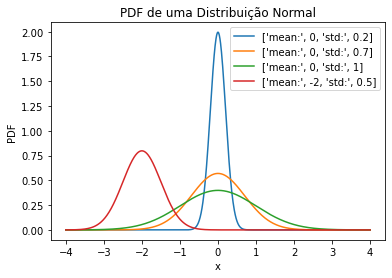

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm

def f(x, mean, sigma):
    return norm.pdf(x,loc=mean,scale=sigma)

x = np.linspace(-4,4,1000) ## range e número de pontos
mean=[0,0,0,-2]; sigma=[0.2, 0.7, 1, 0.5]

plt.xlabel('x')
plt.ylabel('PDF')
plt.title("PDF de uma Distribuição Normal")

for i in range(len(sigma)):
    plt.plot(x, f(x, mean[i], sigma[i]), label = ['mean:' ,mean[i], 'std:', sigma[i]])
    plt.legend()
    plt.xticks(np.arange(min(x), max(x) +1, 1.0))

### Criando Gauss com o Código Raiz da PDF:

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^{2}}$$

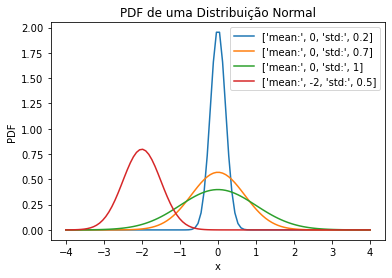

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm

def f(x, mean, sigma):
    #print(x)
    return (1 / (sigma*(np.sqrt(2*np.pi)))) * (np.exp((-0.5) * (np.power(((x-mean)/sigma),2))))

x = np.linspace(-4,4,100) ## range e número de pontos
mean=[0,0,0,-2]; sigma=[0.2, 0.7, 1, 0.5]

plt.xlabel('x')
plt.ylabel('PDF')
plt.title("PDF de uma Distribuição Normal")

for i in range(len(sigma)):
    plt.plot(x, f(x, mean[i], sigma[i]), label = ['mean:' ,mean[i], 'std:', sigma[i]])
    plt.legend()
    plt.xticks(np.arange(min(x), max(x) +1, 1.0))

### Gauss Cumulativa (CDF) com Scipy:

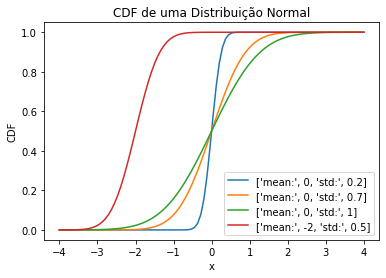

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm

def f(x, mean, sigma):
    return norm.cdf(x,loc=mean,scale=sigma)

x = np.linspace(-4,4,100) ## range e número de pontos
mean=[0,0,0,-2]; sigma=[0.2, 0.7, 1, 0.5]

plt.xlabel('x')
plt.ylabel('CDF')
plt.title("CDF de uma Distribuição Normal")

for i in range(len(sigma)):
    plt.plot(x, f(x, mean[i], sigma[i]), label = ['mean:' ,mean[i], 'std:', sigma[i]])
    plt.legend()
    plt.xticks(np.arange(min(x), max(x) +1, 1.0))

### Gauss CDF: com código raiz

$$ f(x)=\frac{1}{2}[1 + erf(\frac{x-\mu}{\sigma\sqrt{2}})] $$

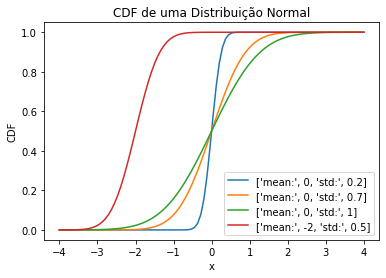

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm
from scipy import special

              
x = np.linspace(-4,4,100) ## range e número de pontos
mean=[0,0,0,-2]; sigma=[0.2, 0.7, 1, 0.5]

def f(x, mean, sigma):
    return (1/2) * (1 + special.erf((x - mean) / (sigma * np.sqrt(2))))

plt.xlabel('x')
plt.ylabel('CDF')
plt.title("CDF de uma Distribuição Normal")

for i in range(len(sigma)):
    plt.plot(x, f(x, mean[i], sigma[i]), label = ['mean:' ,mean[i], 'std:', sigma[i]])
    plt.legend()
    plt.xticks(np.arange(min(x), max(x) +1, 1.0))

### Propriedades da distribuição de Gauss:

Distribuição (Probability Mass Function): $ f(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^{2}}$

Cumulativa (Cumulative Distribution Function): $ f(x)=\frac{1}{2}[1 + erf(\frac{x-\mu}{\sigma\sqrt{2}})] $

Média, Mediana e Moda: $\mu$

Variância: $\sigma^2$

Desvio Padrão: $\sigma$

## Encontrando a Média e Desvio Padrão a partir de uma distribuição PDF:

Vamos trabalhar agora com uma das distribuições utilizadas na primeira parte:

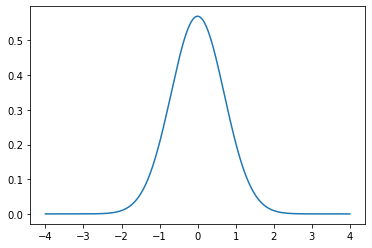

In [6]:
from scipy import stats

## eixo x
distribuicao_x = np.linspace(-4,4,1000)
mu = 0;   sigma = 0.7
  
## eixo y (pdf)
distribuicao_y = stats.norm.pdf(distribuicao_x, mu, sigma)
    
## plot data
plt.plot(distribuicao_x, distribuicao_y)

### Buscando a média, moda e mediana a partir de uma distribuição PDF:
A Partir da função PDF podemos encontrar a sua média encontrando o seu valor mais elevado.

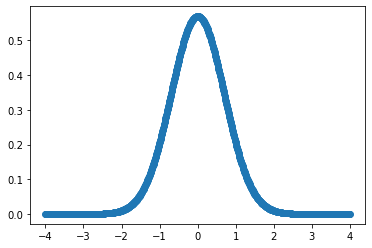

In [7]:
points = [list(distribuicao_x), list(distribuicao_y)]
plt.scatter(x=points[0], y=points[1])

In [8]:
max_y = max(points[1]) # encontra o valor máximo de y
indice = points[1].index(max_y) # encontra o índice do valor anterior
valor = len(points[0])
if (valor % 2 == 0): # par
    media = (points[0][indice] + points[0][indice+1])/2 # faz a média do valor anterior e do próximo
else: # impar
    media = points[0][indice]
print('Média:',media)

Média: 2.220446049250313e-16


### Buscando o valor do Desvio Padrão a partir de uma CDF:

1 desvio da média: 34,135% (0,34135 em relação ao meio)

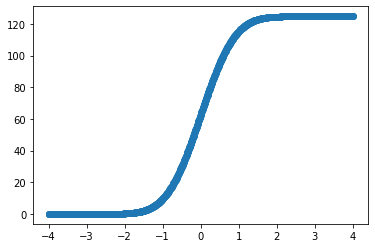

In [9]:
# Criação da distribuição cumulativa a partir da PDF anterior
distribuicao_y_cum = [];   sum_cum = 0
for i in range(len(distribuicao_y)):
    sum_cum = sum_cum + distribuicao_y[i]
    distribuicao_y_cum.append(sum_cum)
plt.scatter(x=points[0], y=distribuicao_y_cum)

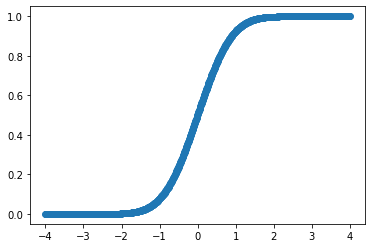

In [10]:
# Aqui estamos normalizando a distribuição acima
max_value = distribuicao_y_cum[-1]
normalized_y = []
for i in range(len(distribuicao_y)):
    normalized_y.append(distribuicao_y_cum[i]/max_value)

plt.scatter(x=points[0], y=normalized_y)

In [11]:
y_media = 0.5;   y_desv = 0.34135;   desvio_da_média = y_media + y_desv#; desvio_da_média

In [12]:
# Aqui foi definida uma função para encontrar o valor mais próximo do valor desejado entre os possíveis
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx], idx

array = normalized_y
value = desvio_da_média
near_y, indice = find_nearest(array, value)
std = points[0][indice]
print('\nDesvio Padrão:', std)


Desvio Padrão: 0.6926926926926926


In [13]:
Var = std ** 2
print('Variância:', Var)

Variância: 0.4798231665098531


Portato é possível realizar a operação inversa a partir dos dados de uma Distribuição de Densidade de Probabilidades, determinando a média, moda, mediana, Desvio Padrão e Variância